In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./mental_health_workplace_survey.csv
./mental_health_workplace_survey.ipynb
./.ipynb_checkpoints\mental_health_workplace_survey-checkpoint.ipynb


In [2]:
df=pd.read_csv('./mental_health_workplace_survey.csv')

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
df

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,28,Female,Brazil,Marketing Manager,Sales,18,46,No,2.86,...,4,Yes,6.97,No,1,80K-100K,7.71,21,7.70,0
2996,3997,24,Male,Brazil,Customer Support,Marketing,14,31,No,2.43,...,1,Yes,5.58,Yes,0,60K-80K,3.76,2,2.59,0
2997,3998,22,Female,Canada,Marketing Manager,Marketing,0,38,No,6.87,...,25,No,3.81,No,0,40K-60K,3.03,2,6.95,0
2998,3999,57,Non-binary,Australia,Data Scientist,HR,2,41,No,3.62,...,24,No,9.72,No,3,100K+,6.02,37,9.06,0


In [5]:
print("Shape of data:", df.shape)
df.info()

Shape of data: (3000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivi

In [6]:
df.isnull().sum()

EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64

In [7]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Gender', 'Country', 'JobRole', 'Department', 'RemoteWork', 'HasMentalHealthSupport', 'HasTherapyAccess', 'SalaryRange']
Numerical Columns: ['EmployeeID', 'Age', 'YearsAtCompany', 'WorkHoursPerWeek', 'BurnoutLevel', 'JobSatisfaction', 'StressLevel', 'ProductivityScore', 'SleepHours', 'PhysicalActivityHrs', 'CommuteTime', 'ManagerSupportScore', 'MentalHealthDaysOff', 'WorkLifeBalanceScore', 'TeamSize', 'CareerGrowthScore', 'BurnoutRisk']


In [8]:
for i in categorical_cols:
    print(i)

Gender
Country
JobRole
Department
RemoteWork
HasMentalHealthSupport
HasTherapyAccess
SalaryRange


In [9]:
for i in numerical_cols:
    print(i)

EmployeeID
Age
YearsAtCompany
WorkHoursPerWeek
BurnoutLevel
JobSatisfaction
StressLevel
ProductivityScore
SleepHours
PhysicalActivityHrs
CommuteTime
ManagerSupportScore
MentalHealthDaysOff
WorkLifeBalanceScore
TeamSize
CareerGrowthScore
BurnoutRisk


In [10]:
df[numerical_cols].describe()

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,ManagerSupportScore,MentalHealthDaysOff,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.00000,3000.00000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,2500.500000,40.805667,10.099333,44.504000,5.509137,5.43750,5.51535,5.51956,6.539000,5.030400,59.227000,5.44254,4.544667,5.450950,25.20100,5.520680,0.326667
std,866.169729,11.011705,6.035032,8.491526,2.574072,2.59443,2.60361,2.60761,1.441876,2.861026,34.809779,2.59740,2.854129,2.602379,14.08645,2.566861,0.469072
min,1001.000000,22.000000,0.000000,30.000000,1.000000,1.00000,1.00000,1.00000,4.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.00000,1.000000,0.000000
25%,1750.750000,31.000000,5.000000,37.000000,3.300000,3.18000,3.26000,3.28000,5.300000,2.600000,29.000000,3.16000,2.000000,3.160000,13.00000,3.300000,0.000000
50%,2500.500000,41.000000,10.000000,45.000000,5.480000,5.43000,5.49500,5.49000,6.600000,5.000000,59.000000,5.44000,5.000000,5.425000,25.00000,5.580000,0.000000
75%,3250.250000,50.000000,15.000000,52.000000,7.640000,7.68000,7.82250,7.80250,7.800000,7.500000,90.000000,7.69000,7.000000,7.730000,37.00000,7.642500,1.000000
max,4000.000000,59.000000,20.000000,59.000000,10.000000,10.00000,10.00000,10.00000,9.000000,10.000000,119.000000,9.99000,9.000000,10.000000,49.00000,9.990000,1.000000


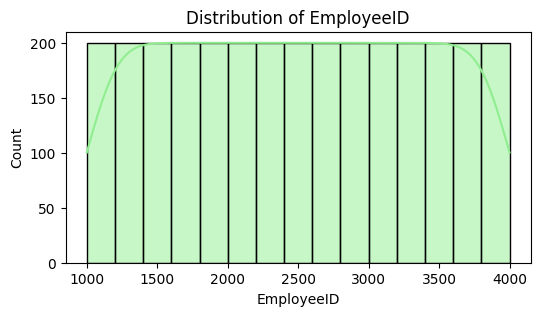

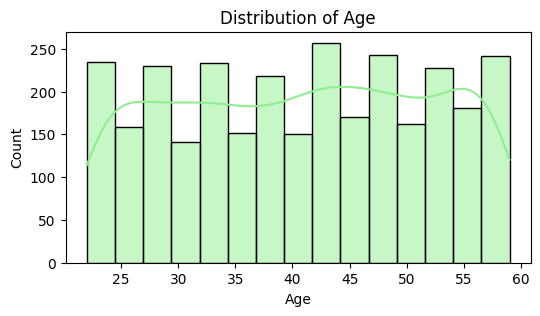

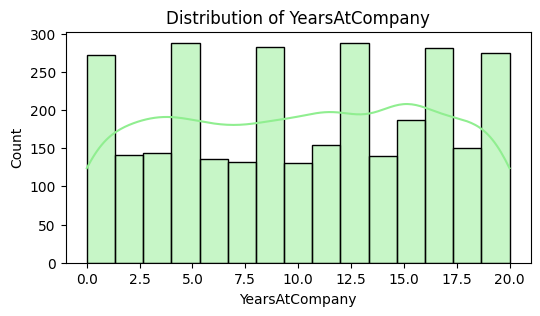

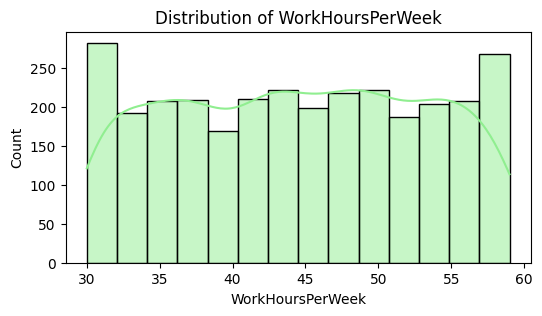

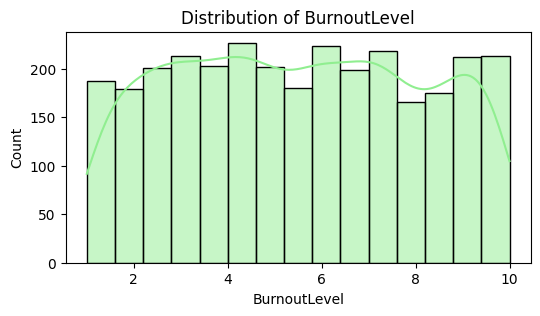

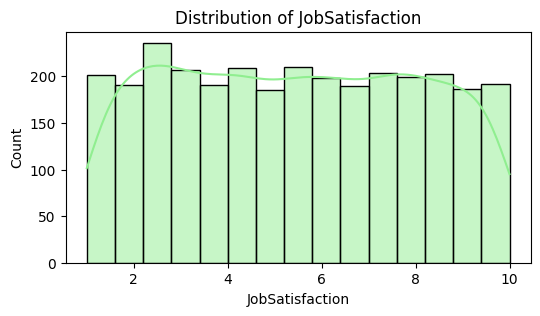

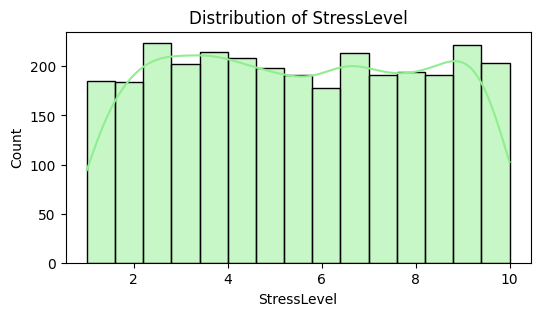

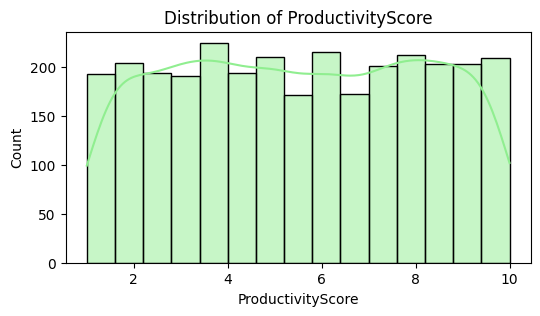

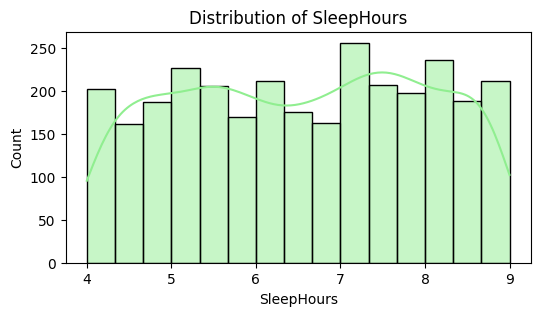

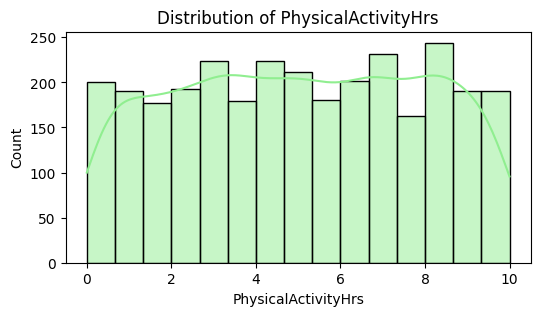

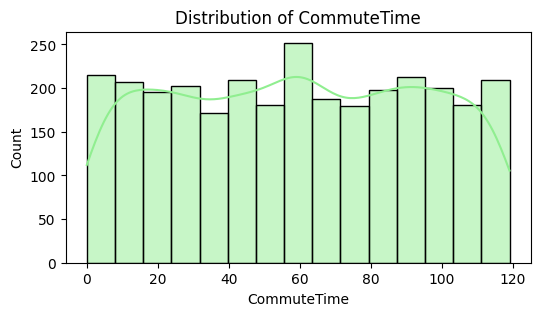

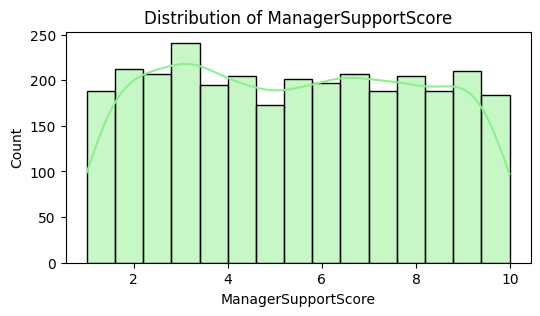

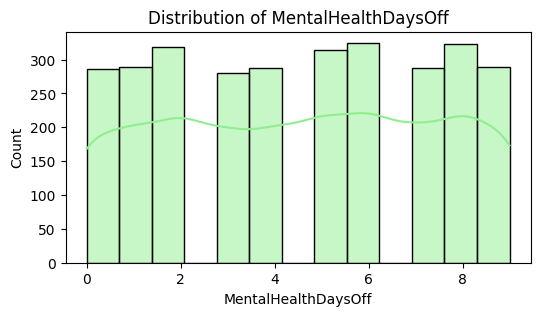

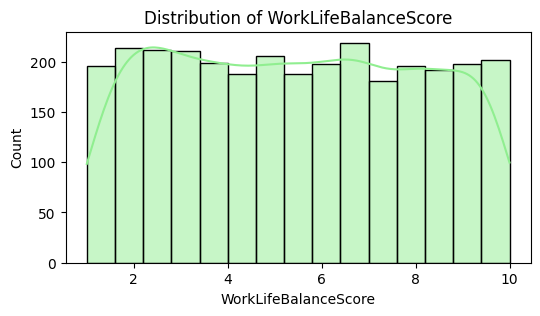

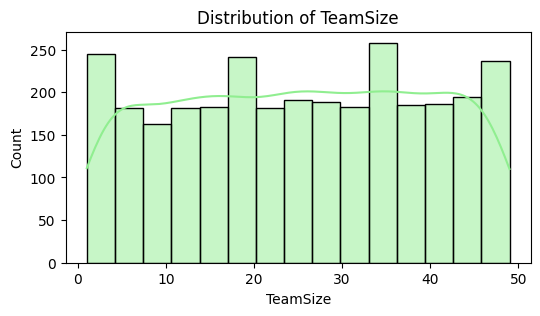

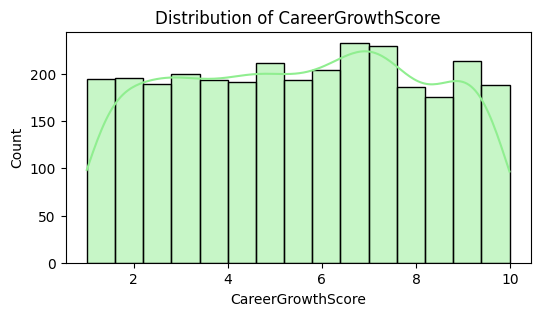

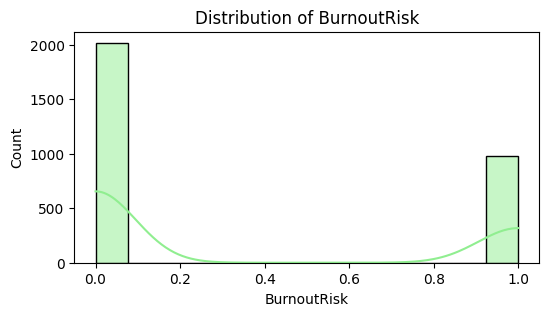

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, color='lightgreen')
    plt.title(f"Distribution of {col}")
    plt.show()

<====================== Here is the counts  :======================>
Gender
Non-binary           757
Prefer not to say    757
Male                 752
Female               734
Name: count, dtype: int64


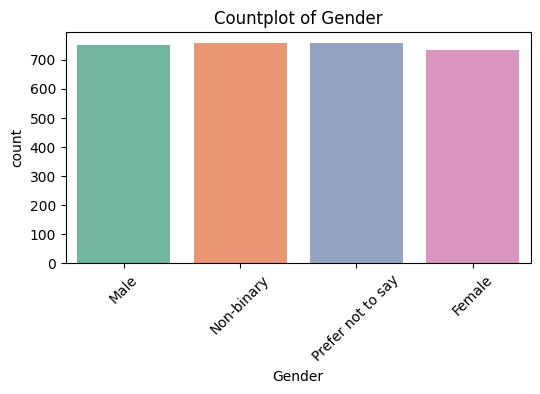

<====================== Here is the counts  :======================>
Country
India        464
Brazil       443
Canada       434
UK           427
Australia    418
USA          408
Germany      406
Name: count, dtype: int64


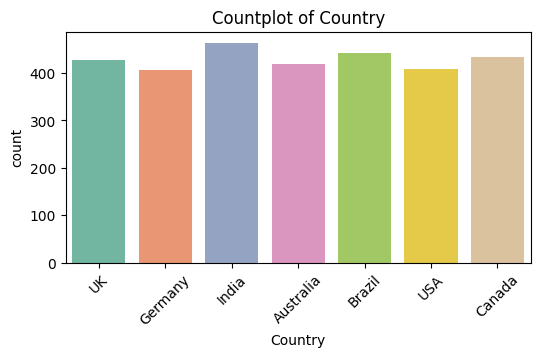

<====================== Here is the counts  :======================>
JobRole
Data Scientist       411
Software Engineer    401
Customer Support     380
Marketing Manager    372
Project Manager      362
HR Specialist        361
IT Admin             358
Sales Associate      355
Name: count, dtype: int64


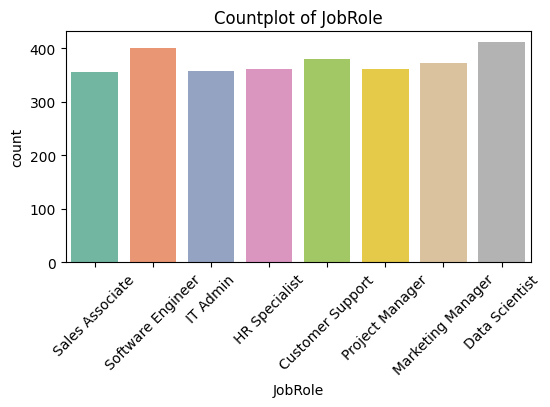

<====================== Here is the counts  :======================>
Department
HR             525
Sales          522
Marketing      521
Engineering    488
IT             482
Support        462
Name: count, dtype: int64


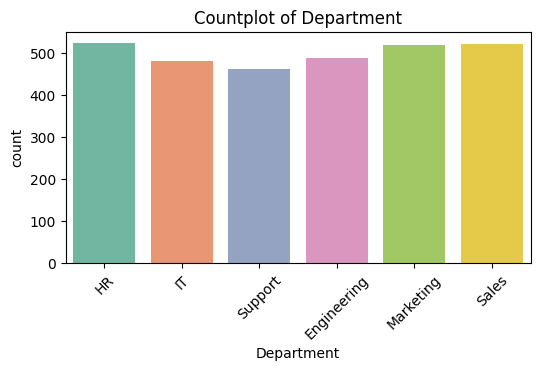

<====================== Here is the counts  :======================>
RemoteWork
Hybrid    1022
No         990
Yes        988
Name: count, dtype: int64


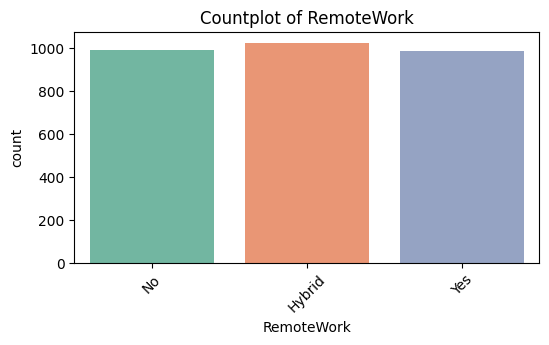

<====================== Here is the counts  :======================>
HasMentalHealthSupport
No     1531
Yes    1469
Name: count, dtype: int64


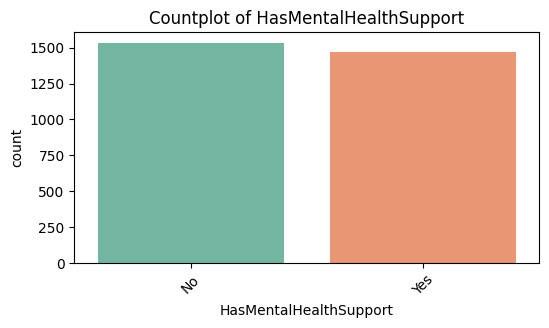

<====================== Here is the counts  :======================>
HasTherapyAccess
No     1511
Yes    1489
Name: count, dtype: int64


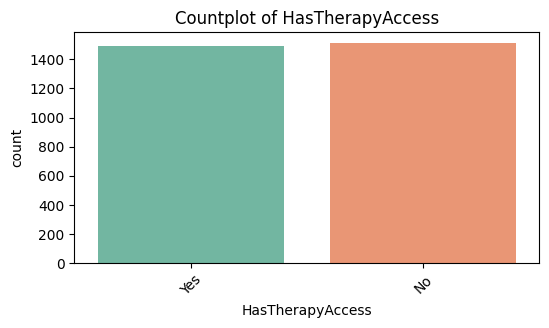

<====================== Here is the counts  :======================>
SalaryRange
100K+       640
80K-100K    600
<40K        594
40K-60K     593
60K-80K     573
Name: count, dtype: int64


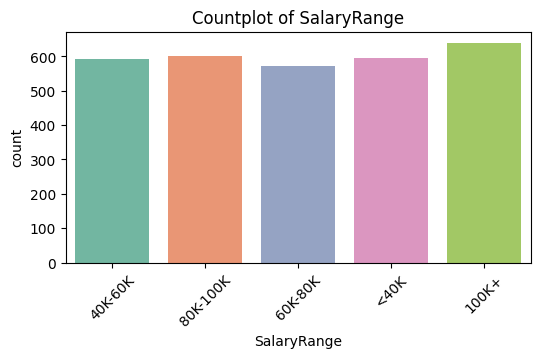

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")
    print("<====================== Here is the counts  :======================>")
    print(df[col].value_counts())
    plt.show()

<===============================================================================>




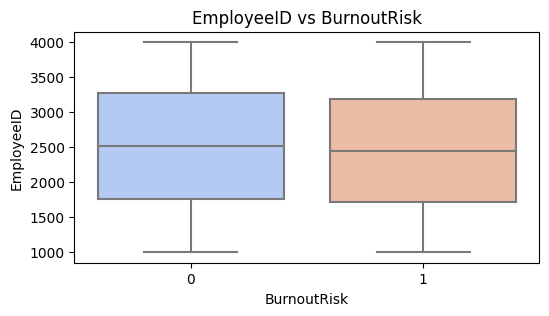

<===============================================================================>




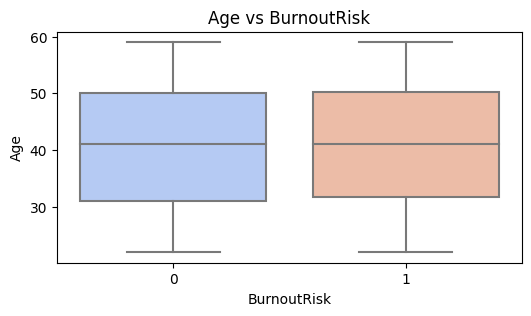

<===============================================================================>




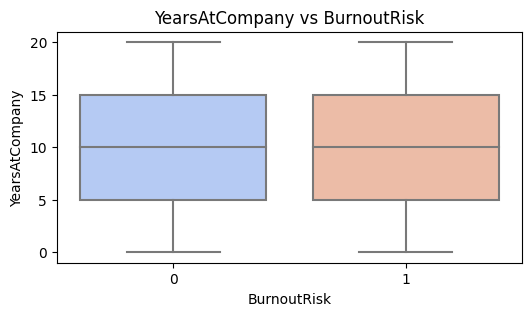

<===============================================================================>




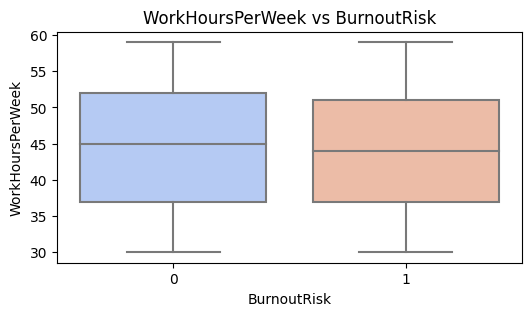

<===============================================================================>




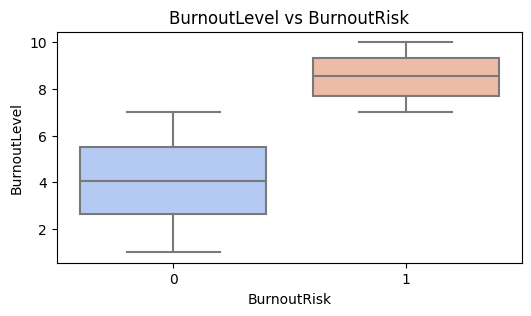

<===============================================================================>




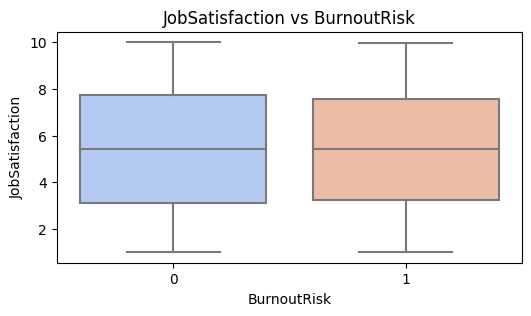

<===============================================================================>




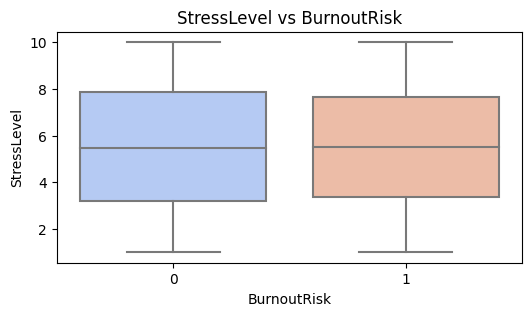

<===============================================================================>




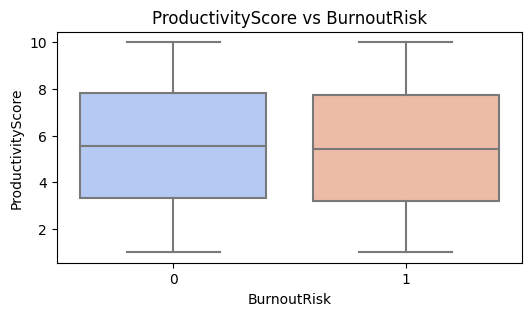

<===============================================================================>




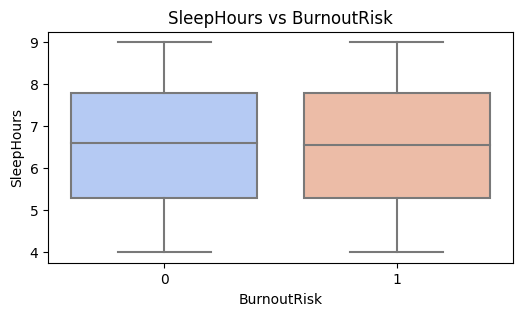

<===============================================================================>




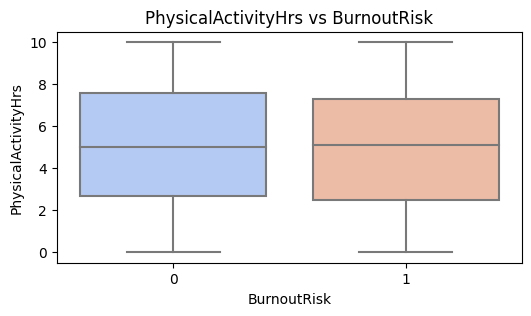

<===============================================================================>




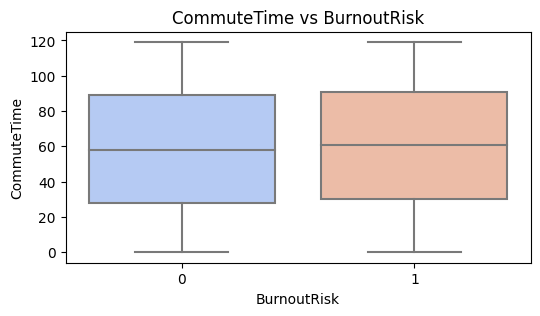

<===============================================================================>




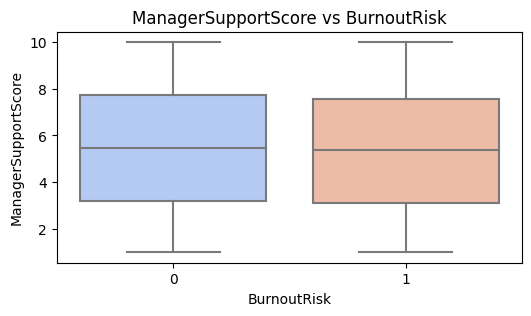

<===============================================================================>




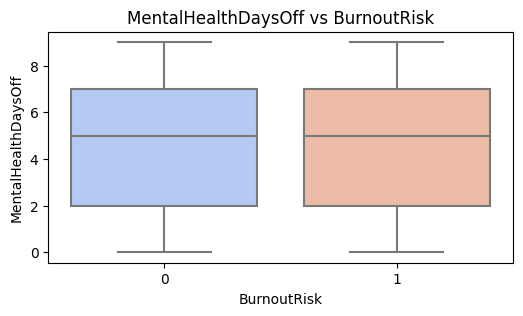

<===============================================================================>




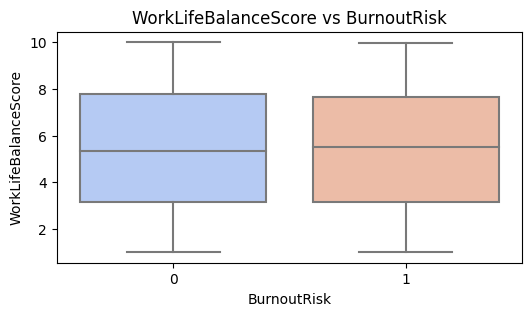

<===============================================================================>




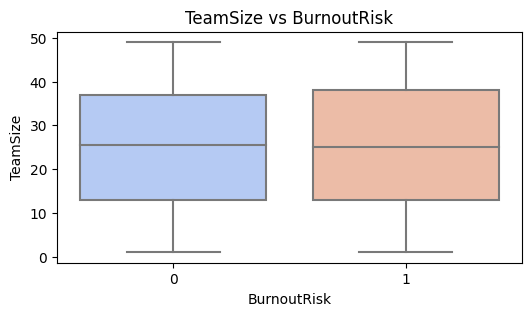

<===============================================================================>




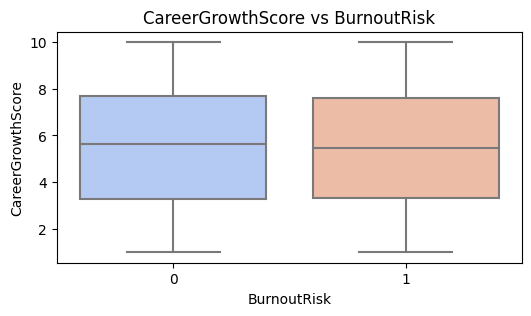

<===============================================================================>




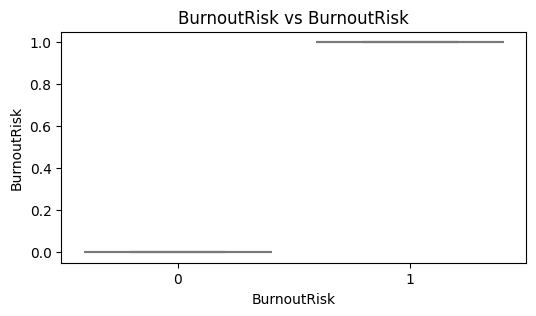

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x='BurnoutRisk', y=col, palette='coolwarm')
    plt.title(f"{col} vs BurnoutRisk")
    print("<===============================================================================>")
    print("\n")
    plt.show()

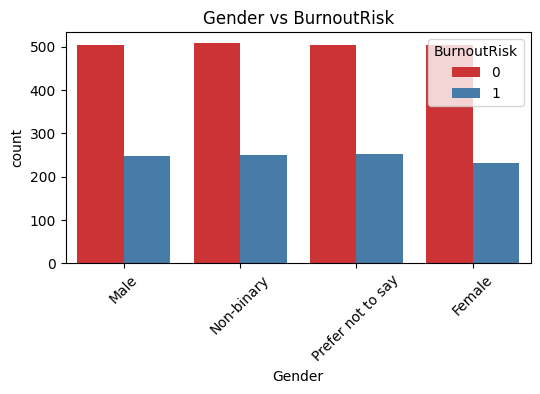

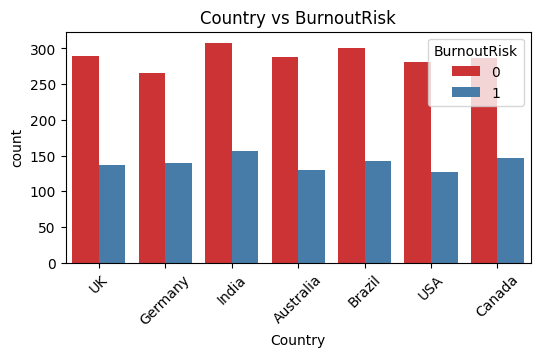

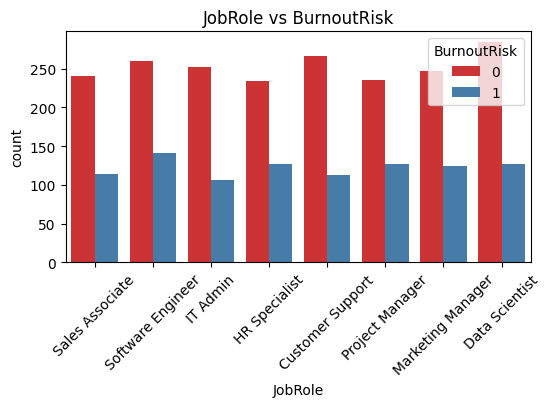

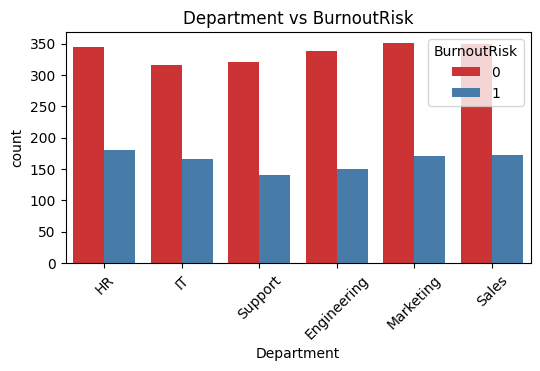

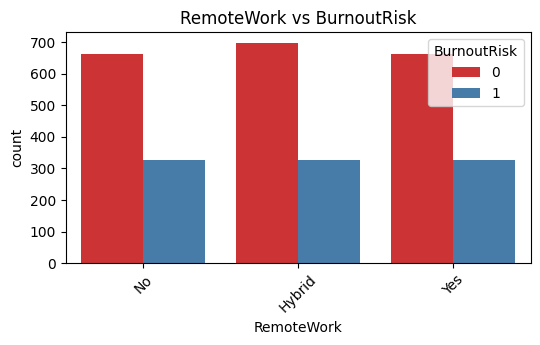

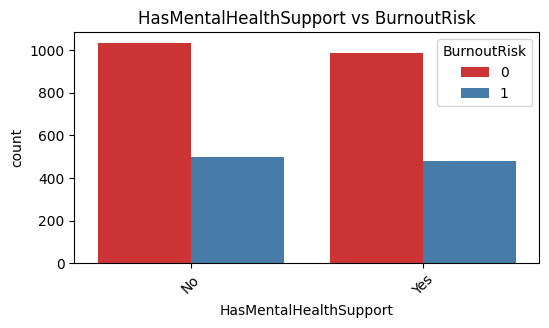

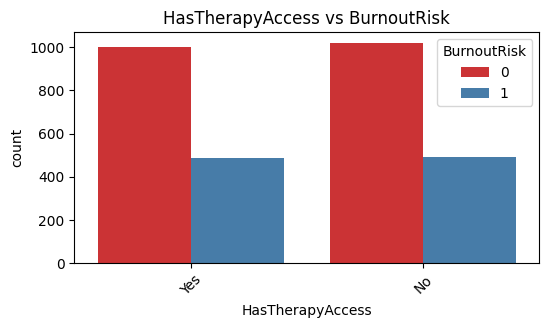

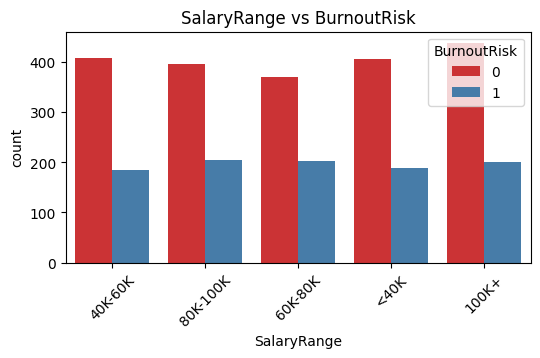

In [14]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='BurnoutRisk', palette='Set1')
    plt.xticks(rotation=45)
    plt.title(f"{col} vs BurnoutRisk")
    plt.show()

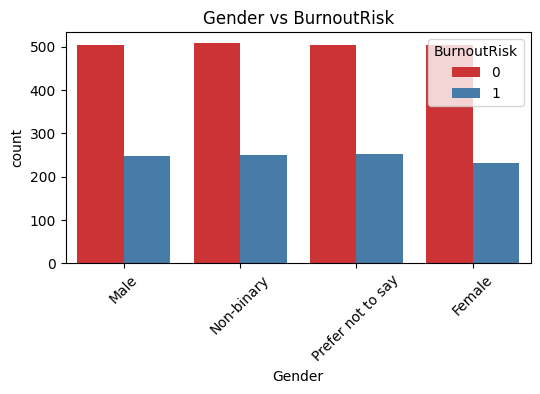

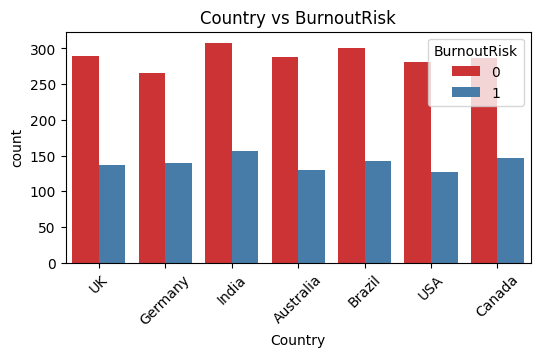

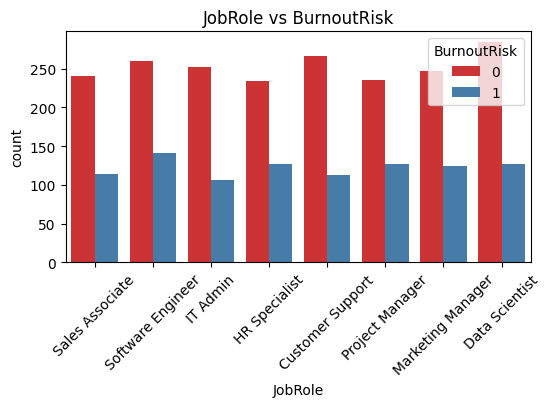

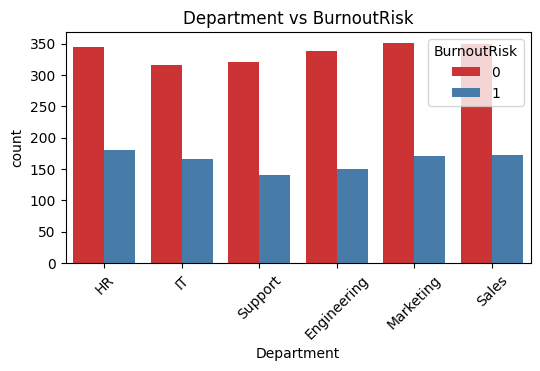

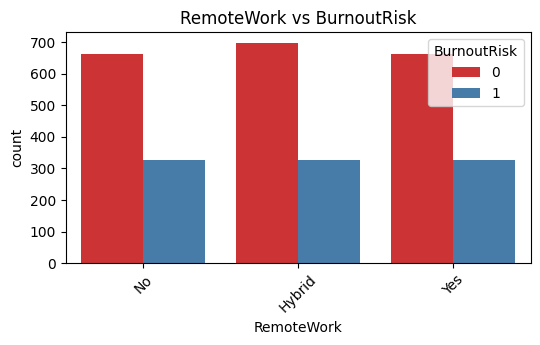

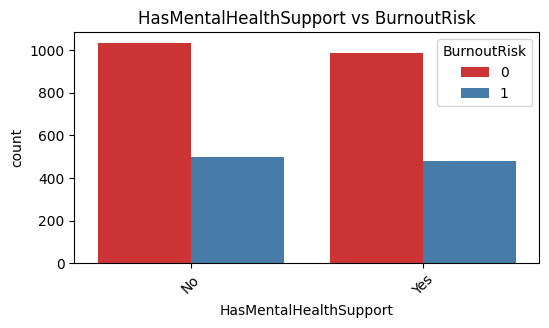

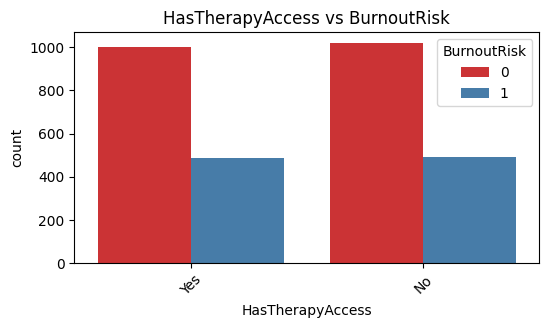

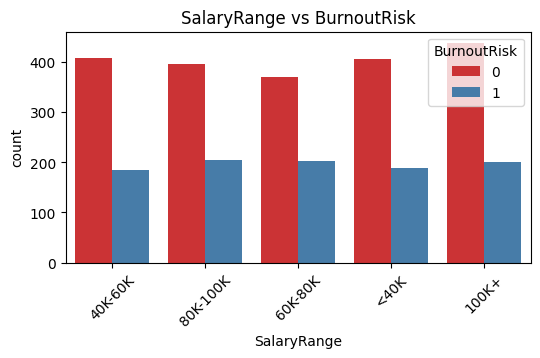

In [15]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='BurnoutRisk', palette='Set1')
    plt.xticks(rotation=45)
    plt.title(f"{col} vs BurnoutRisk")
    plt.show()

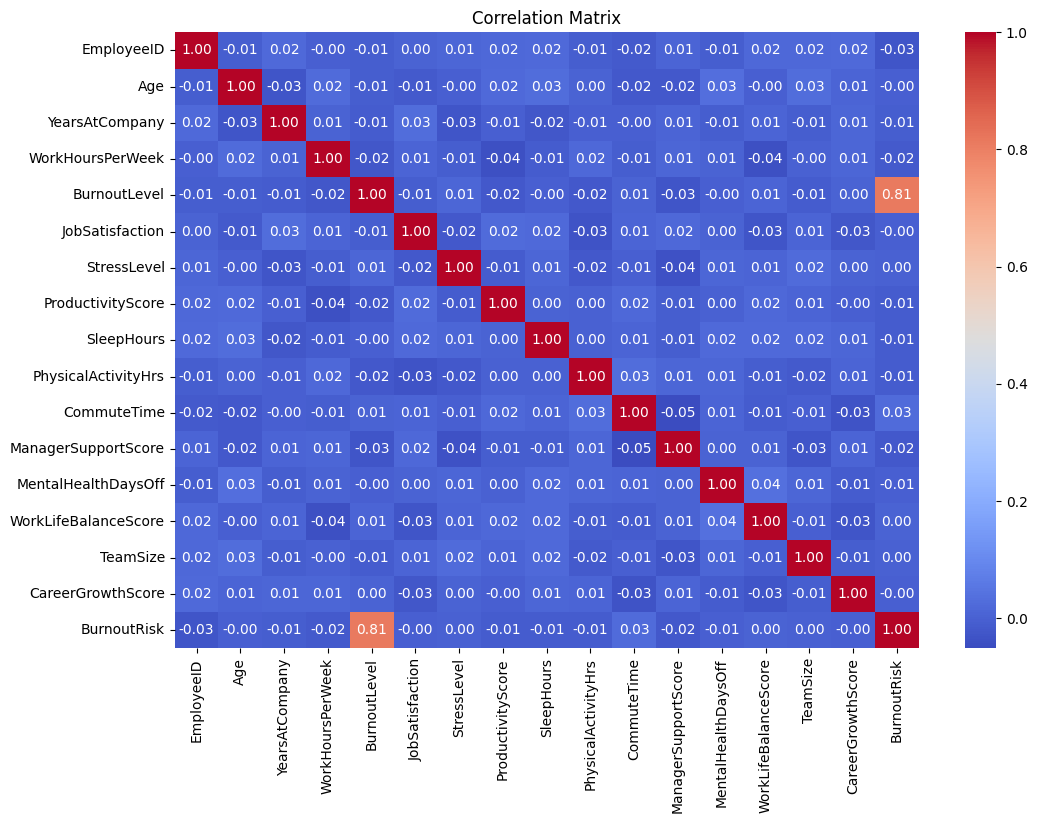

In [16]:
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

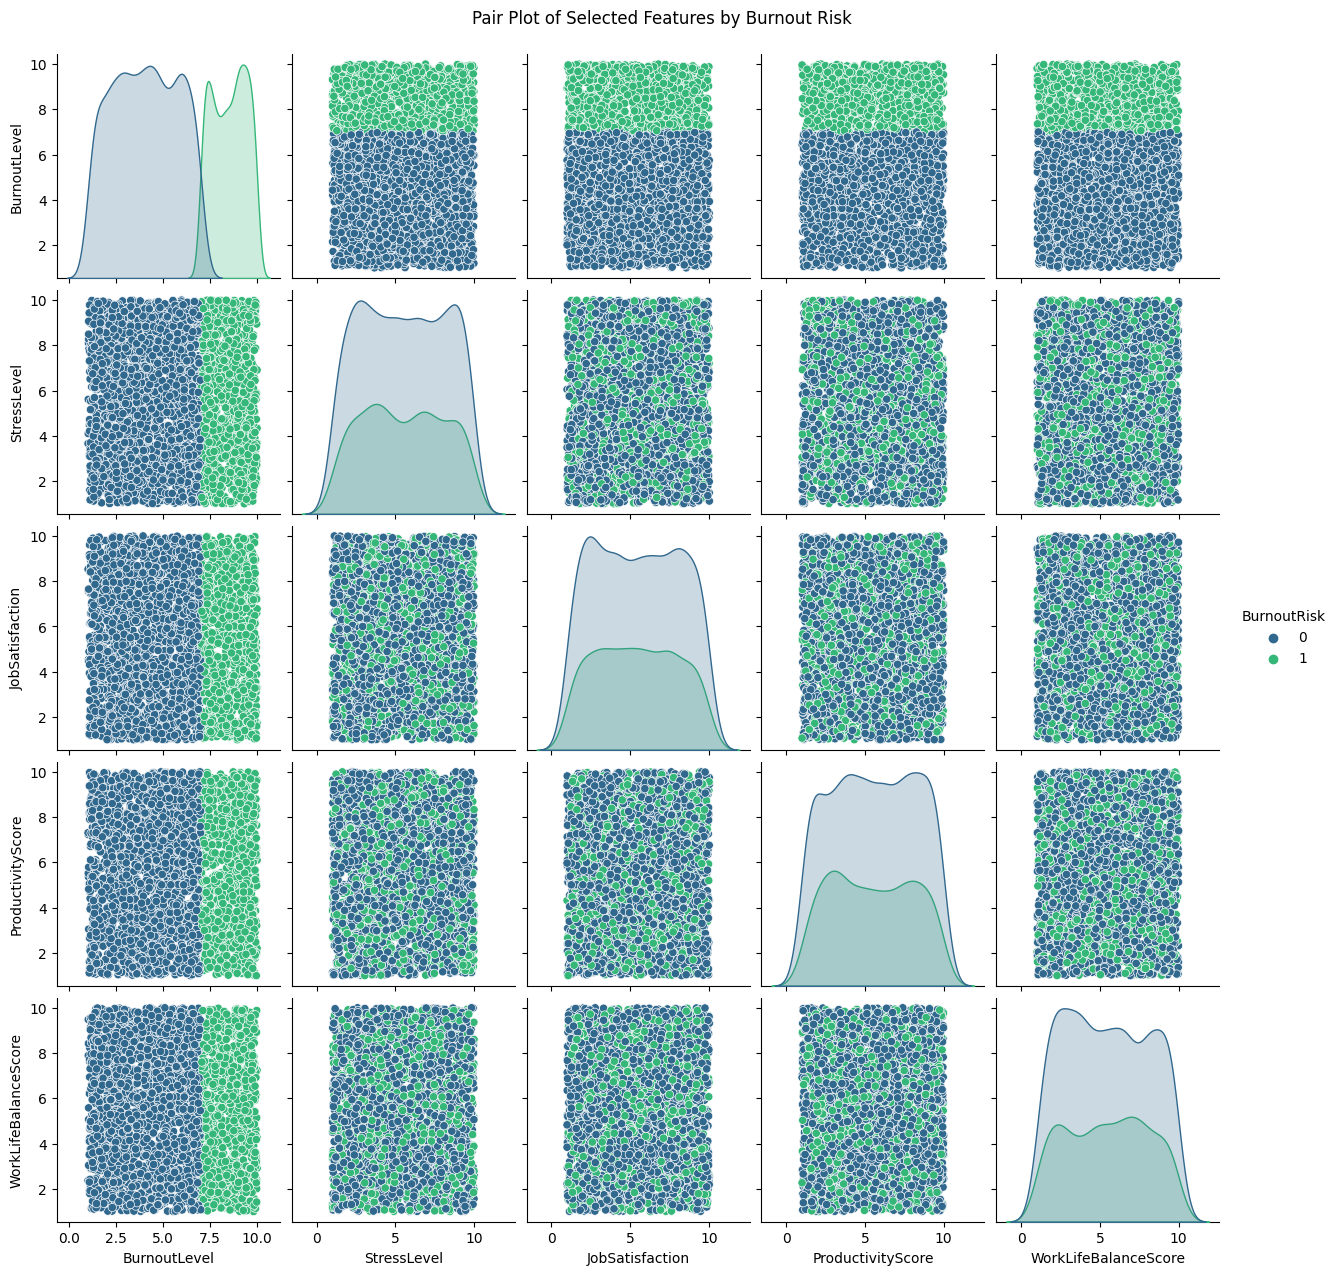

In [17]:
subset_features = [
    'BurnoutLevel',
    'StressLevel',
    'JobSatisfaction',
    'ProductivityScore',
    'WorkLifeBalanceScore',
    'BurnoutRisk'
]
df['BurnoutRisk'] = df['BurnoutRisk'].astype('category')

sns.pairplot(df[subset_features], hue='BurnoutRisk', palette='viridis')
plt.suptitle('Pair Plot of Selected Features by Burnout Risk', y=1.02)
plt.show()

In [18]:
X = df.drop(["BurnoutRisk", "BurnoutLevel", "EmployeeID"], axis=1)
y = df['BurnoutRisk']

In [19]:
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2400, 22)
Shape of X_test: (600, 22)
Shape of y_train: (2400,)
Shape of y_test: (600,)


In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [24]:
results = []
for name, model in models.items():
    print(f"🔁 Running CV for: {name}")
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results.append({
        'Model': name,
        'Mean Accuracy': scores.mean(),
        'Std Dev': scores.std()
    })

🔁 Running CV for: Logistic Regression
🔁 Running CV for: Random Forest
🔁 Running CV for: SVM
🔁 Running CV for: Decision Tree
🔁 Running CV for: Naive Bayes
🔁 Running CV for: K-Nearest Neighbors


In [25]:
df_results = pd.DataFrame(results).sort_values(by='Mean Accuracy', ascending=False)
print("\n📊 K-Fold CV Results:")
print(df_results)


📊 K-Fold CV Results:
                 Model  Mean Accuracy       Std Dev
0  Logistic Regression       0.673333  1.110223e-16
2                  SVM       0.673333  1.110223e-16
4          Naive Bayes       0.673333  1.110223e-16
1        Random Forest       0.670000  4.714045e-03
5  K-Nearest Neighbors       0.617000  1.508863e-02
3        Decision Tree       0.554667  2.741451e-02


In [26]:
df_results["Mean Accuracy"]=df_results["Mean Accuracy"]*100

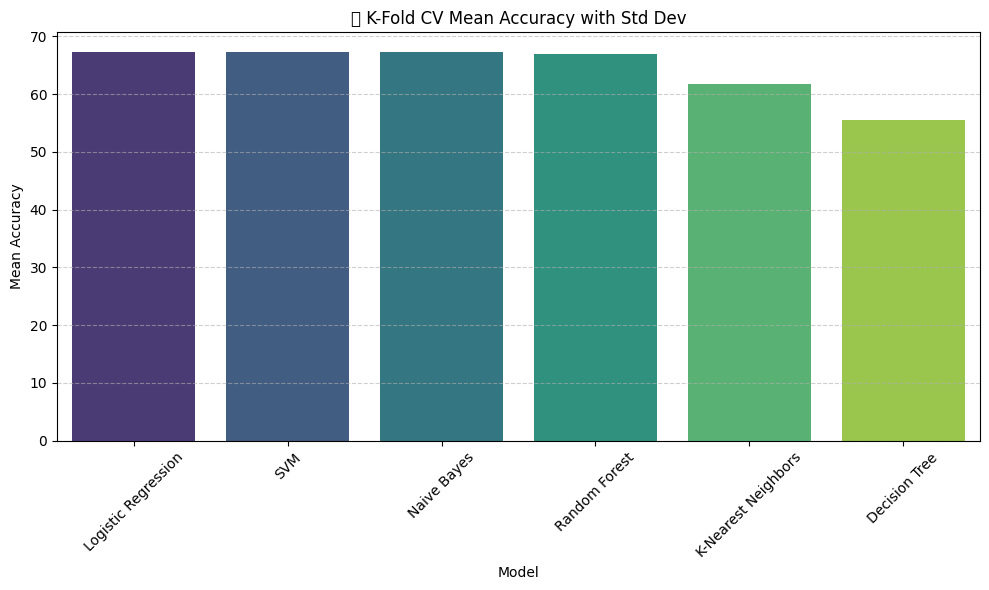

In [27]:
df_results.sort_values("Mean Accuracy", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Mean Accuracy',
    data=df_results,
    palette='viridis',
    capsize=0.2
)

# Customize
plt.title("📊 K-Fold CV Mean Accuracy with Std Dev")
plt.ylabel("Mean Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()